# Climate Prediction Results

In [1]:
import pandas as pd
import os
import sys
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR



In [2]:
# Add the folder to the Python path

os.chdir("../")
# change working directory to project's root path
print(os.getcwd())

folder_path = os.path.abspath("functions/") #INPUT_PATH)#'path_to_your_folder')  # Replace with the actual folder path
sys.path.insert(0, folder_path)

from Predictions import (
    get_info_experiment,
    summarize_best_results_by_index,
    plot_average_best_results,
    plot_best_results_per_season,
    PredictionExperiment
)

c:\Users\marti\Desktop\data\hw_extra


In [3]:
my_indices_path = "data/my_indices/metadata.csv"
extra_indices_path = "data/extra_indices/metadata.csv"

## California

In [4]:
region = "california"
metadata_exp_path = f"data/climate_features/{region}/metadata.csv"
metadata = pd.read_csv(metadata_exp_path)
metadata.rename(columns={"id":"id_data"}, inplace=True)
metadata

,id_data,filename,season,indices
0,6e47cb06,predictor_6e47cb06_1.parquet,1,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
1,6e47cb06,predictor_6e47cb06_2.parquet,2,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
2,6e47cb06,predictor_6e47cb06_3.parquet,3,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
3,6e47cb06,predictor_6e47cb06_4.parquet,4,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
4,6e47cb06,predictor_6e47cb06_5.parquet,5,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
5,6e47cb06,predictor_6e47cb06_6.parquet,6,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
6,6e47cb06,predictor_6e47cb06_7.parquet,7,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
7,6e47cb06,predictor_6e47cb06_8.parquet,8,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
8,6e47cb06,predictor_6e47cb06_9.parquet,9,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
9,6e47cb06,predictor_6e47cb06_10.parquet,10,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...


In [5]:
results = pd.read_csv(f"data/climate_results/{region}_results/results.csv")
results

,model,season,metric,stage,HWN,HWF,HWD,HWM,HWA,Average,id_data
0,Linear,1,r2,prediction,-1.642946e+00,-4.518256e-01,-3.560293e-01,-5.747328e-01,-5.552942e-01,-7.161656e-01,6e47cb06
1,RF5,1,r2,prediction,6.158940e-02,1.888554e-01,-1.462744e-01,-2.613155e-01,-2.458589e-01,-8.060082e-02,6e47cb06
2,RF10,1,r2,prediction,-2.068709e-01,2.744506e-02,-1.776184e-01,-2.402910e-01,-3.509477e-01,-1.896566e-01,6e47cb06
3,SVR-rbf,1,r2,prediction,-5.976623e-01,-5.715922e-01,-6.807609e-01,-6.993999e-01,-6.817418e-01,-6.462314e-01,6e47cb06
4,XGB10,1,r2,prediction,-4.869645e-01,-4.083856e-01,-1.174196e-02,-3.442603e-01,-2.824881e-01,-3.067681e-01,6e47cb06
...,...,...,...,...,...,...,...,...,...,...,...
3763,GPR-rbf-noise,12,mape,TSCV,3.183750e+14,1.038137e+15,8.791890e+14,4.300049e+14,6.286105e+14,6.588632e+14,5cb3fa02
3764,GPR-rbf,12,mape,TSCV,2.604514e+14,9.564736e+02,3.828848e+02,9.670269e+13,1.226033e+02,7.143081e+13,5cb3fa02
3765,CBR-10,12,mape,TSCV,2.680894e+14,1.166157e+15,9.750412e+14,4.004336e+14,6.855452e+14,6.990533e+14,5cb3fa02
3766,CBR-20,12,mape,TSCV,2.525770e+14,1.092799e+15,9.096127e+14,3.619974e+14,6.295607e+14,6.493094e+14,5cb3fa02


In [6]:
# Example usage
summary_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=2, stage="prediction")
summary_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=2, stage="prediction")
summary_cv_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=2, stage="CV")
summary_cv_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=2, stage="CV")
summary_tscv_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=2, stage="TSCV")
summary_tscv_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=2, stage="TSCV")

In [7]:
summary_tscv_r2

,model,season,id_data,index,best_value,filename,indices
0,XGBL10,5,5cb3fa02,Average,0.130190,predictor_5cb3fa02_5.parquet,e19aa330-19496680-f27c56aa-5b9237bf-46fa0cb8-6...
1,XGBL5,5,5cb3fa02,Average,0.126148,predictor_5cb3fa02_5.parquet,e19aa330-19496680-f27c56aa-5b9237bf-46fa0cb8-6...
2,XGBL10,5,5cb3fa02,HWA,0.112388,predictor_5cb3fa02_5.parquet,e19aa330-19496680-f27c56aa-5b9237bf-46fa0cb8-6...
3,XGBL5,1,5cb3fa02,HWA,0.110897,predictor_5cb3fa02_1.parquet,e19aa330-19496680-f27c56aa-5b9237bf-46fa0cb8-6...
4,RF15,10,5cb3fa02,HWD,0.312670,predictor_5cb3fa02_10.parquet,e19aa330-19496680-f27c56aa-5b9237bf-46fa0cb8-6...
5,RF10,10,5cb3fa02,HWD,0.239398,predictor_5cb3fa02_10.parquet,e19aa330-19496680-f27c56aa-5b9237bf-46fa0cb8-6...
6,XGBL15,10,5cb3fa02,HWF,0.194411,predictor_5cb3fa02_10.parquet,e19aa330-19496680-f27c56aa-5b9237bf-46fa0cb8-6...
7,Linear,10,5cb3fa02,HWF,0.163766,predictor_5cb3fa02_10.parquet,e19aa330-19496680-f27c56aa-5b9237bf-46fa0cb8-6...
8,XGBL5,1,5cb3fa02,HWM,0.095592,predictor_5cb3fa02_1.parquet,e19aa330-19496680-f27c56aa-5b9237bf-46fa0cb8-6...
9,XGBL10,5,5cb3fa02,HWM,0.090179,predictor_5cb3fa02_5.parquet,e19aa330-19496680-f27c56aa-5b9237bf-46fa0cb8-6...


In [8]:
cv_r2_seasons = {}
cv_mape_seasons = {}
r2_seasons = {}
mape_seasons = {}
tscv_r2_seasons = {}
tscv_mape_seasons = {}
for i in range(13):
    results_season = results[results["season"]==i]
    cv_r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="CV" , top_n=1)
    tscv_r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="TSCV" , top_n=1)
    r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="prediction", top_n=1)
    mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="prediction", top_n=1)
    cv_mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="CV", top_n=1)
    tscv_mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="TSCV", top_n=1)

cv_r2_seasons = pd.concat(list(cv_r2_seasons.values()))
cv_mape_seasons = pd.concat(list(cv_mape_seasons.values()))
tscv_r2_seasons = pd.concat(list(tscv_r2_seasons.values()))
tscv_mape_seasons = pd.concat(list(tscv_mape_seasons.values()))
r2_seasons = pd.concat(list(r2_seasons.values()))
mape_seasons = pd.concat(list(mape_seasons.values()))


In [9]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(tscv_r2_seasons)

,model,index,best_value,id_data,filename,season,indices
0,XGBL5,Average,0.124113,5cb3fa02,predictor_5cb3fa02_1.parquet,1,e19aa330-19496680-f27c56aa-5b9237bf-46fa0cb8-6...
1,XGBL5,HWA,0.110897,5cb3fa02,predictor_5cb3fa02_1.parquet,1,e19aa330-19496680-f27c56aa-5b9237bf-46fa0cb8-6...
2,XGBL5,HWD,-0.012845,5cb3fa02,predictor_5cb3fa02_1.parquet,1,e19aa330-19496680-f27c56aa-5b9237bf-46fa0cb8-6...
3,XGBL15,HWF,0.143810,5cb3fa02,predictor_5cb3fa02_1.parquet,1,e19aa330-19496680-f27c56aa-5b9237bf-46fa0cb8-6...
4,XGBL5,HWM,0.095592,5cb3fa02,predictor_5cb3fa02_1.parquet,1,e19aa330-19496680-f27c56aa-5b9237bf-46fa0cb8-6...
5,XGBL15,HWN,0.319878,5cb3fa02,predictor_5cb3fa02_1.parquet,1,e19aa330-19496680-f27c56aa-5b9237bf-46fa0cb8-6...
0,XGBL5,Average,0.097957,5cb3fa02,predictor_5cb3fa02_2.parquet,2,e19aa330-19496680-f27c56aa-5b9237bf-46fa0cb8-6...
1,XGBL5,HWA,0.012937,5cb3fa02,predictor_5cb3fa02_2.parquet,2,e19aa330-19496680-f27c56aa-5b9237bf-46fa0cb8-6...
2,XGBL5,HWD,0.160707,5cb3fa02,predictor_5cb3fa02_2.parquet,2,e19aa330-19496680-f27c56aa-5b9237bf-46fa0cb8-6...
3,XGBL5,HWF,0.139139,5cb3fa02,predictor_5cb3fa02_2.parquet,2,e19aa330-19496680-f27c56aa-5b9237bf-46fa0cb8-6...


In [10]:
get_info_experiment("5cb3fa02", metadata_exp_path=metadata_exp_path, metadata_index_path=my_indices_path, extra_indices_path=extra_indices_path)

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
e19aa330,index_e19aa330.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
19496680,index_19496680.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
f27c56aa,index_f27c56aa.parquet,anom,1,SP,236|246|37.5|43,1980-2010,1972-2022
5b9237bf,index_5b9237bf.parquet,anom,1,SP,236|246|32|37.5,1980-2010,1972-2022
46fa0cb8,index_46fa0cb8.parquet,max,1,SP,190|235|15|43,NoRef,1972-2022
63520cd8,index_63520cd8.parquet,anom,1,U10,236|246|32|43,1980-2010,1972-2022
PDO,pdo.dat,EOF,1,SSTAnom,110|260|20|70,unknown,1972-2022
ONI,oni.txt,Anom,3,SST,190|240|-5|5,30yearsliding,1972-2022
SAM,sam.txt,DifAnom,1,SLP,X|X|-65|-40,1981-2010,1972-2022


In [29]:
id = "5cb3fa02"
season = 10
data = {season: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_{season}.parquet")}
data[season].drop(columns=["HWN", "HWA", "HWF", "HWM"], inplace=True)
labels = ["HWD"]
experiment_1 = PredictionExperiment(data, labels, [RandomForestRegressor(random_state=42, n_estimators=15)], ["RF15"], 5, id)
experiment_1.execute_experiment()
experiment_1.get_metrics("r2", "prediction", show=False)
experiment_1.get_metrics("mape", "prediction", show=False)
experiment_1.get_metrics("r2", stage="training", show=False)
experiment_1.get_metrics("mape", stage="training", show=False)
experiment_1.get_metrics("r2", stage="CV", show=False)
experiment_1.get_metrics("mape", stage="CV", show=False)
experiment_1.get_metrics("r2", stage="TSCV", show=False)
experiment_1.get_metrics("mape", stage="TSCV", show=False)

FileNotFoundError: [Errno 2] No such file or directory: 'data/climate_features/chile/predictor_5cb3fa02_10.parquet'

In [30]:
experiment_1.get_feature_importance(season, "RF15", method="mdi")

KeyError: 10

In [31]:
experiment_1.get_feature_importance(season, "RF15", method="permutation")

KeyError: 10

## Chile

In [13]:
region = "chile"
metadata_exp_path = f"data/climate_features/{region}/metadata.csv"
metadata = pd.read_csv(metadata_exp_path)
metadata.rename(columns={"id":"id_data"}, inplace=True)
metadata

,id_data,filename,season,indices
0,978f49d7,predictor_978f49d7_1.parquet,1,8334b687-f25567c1-43701738-e306f58b-e601b072-e...
1,978f49d7,predictor_978f49d7_2.parquet,2,8334b687-f25567c1-43701738-e306f58b-e601b072-e...
2,978f49d7,predictor_978f49d7_3.parquet,3,8334b687-f25567c1-43701738-e306f58b-e601b072-e...
3,978f49d7,predictor_978f49d7_4.parquet,4,8334b687-f25567c1-43701738-e306f58b-e601b072-e...
4,978f49d7,predictor_978f49d7_5.parquet,5,8334b687-f25567c1-43701738-e306f58b-e601b072-e...
...,...,...,...,...
127,3832cbd6,predictor_3832cbd6_8.parquet,8,a1bff473-4e788494-13e2f761-f5811892-2748fd3a-4...
128,3832cbd6,predictor_3832cbd6_9.parquet,9,a1bff473-4e788494-13e2f761-f5811892-2748fd3a-4...
129,3832cbd6,predictor_3832cbd6_10.parquet,10,a1bff473-4e788494-13e2f761-f5811892-2748fd3a-4...
130,3832cbd6,predictor_3832cbd6_11.parquet,11,a1bff473-4e788494-13e2f761-f5811892-2748fd3a-4...


In [14]:
results = pd.read_csv(f"data/climate_results/{region}_results/results.csv")
results

,model,season,metric,stage,HWN,HWF,HWD,HWM,HWA,Average,id_data
0,Linear,1,r2,prediction,-5.541156e-01,-4.860050e-01,-5.524741e-01,-2.182027e-01,1.595489e-01,-3.302497e-01,f2a9d7a9
1,RF5,1,r2,prediction,-2.092453e+00,-1.222445e+00,-1.278692e+00,-1.576388e+00,-1.808586e+00,-1.595713e+00,f2a9d7a9
2,RF10,1,r2,prediction,-2.115566e+00,-1.331914e+00,-1.299212e+00,-1.166963e+00,-1.257346e+00,-1.434200e+00,f2a9d7a9
3,SVR-rbf,1,r2,prediction,-8.516489e-01,-1.454943e+00,-9.615840e-01,-7.194679e-01,-1.239079e+00,-1.045345e+00,f2a9d7a9
4,XGB10,1,r2,prediction,-5.290374e-01,-9.226811e-01,-3.470757e-01,-2.099681e+00,-2.939683e+00,-1.367632e+00,f2a9d7a9
...,...,...,...,...,...,...,...,...,...,...,...
18451,XGBT15,12,mape,TSCV,8.880085e+13,3.339687e+14,2.968993e+14,1.356405e+14,2.107143e+14,2.132047e+14,3832cbd6
18452,GPR-rbf-noise,12,mape,TSCV,1.970021e+14,5.418940e+14,5.315980e+14,2.583571e+14,4.533764e+14,3.964455e+14,3832cbd6
18453,CBR-10,12,mape,TSCV,1.600576e+14,5.695494e+14,4.808861e+14,2.449801e+14,4.307679e+14,3.772482e+14,3832cbd6
18454,CBR-20,12,mape,TSCV,1.352458e+14,4.732902e+14,3.952684e+14,1.880092e+14,3.272362e+14,3.038100e+14,3832cbd6


In [15]:
# Example usage
summary_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=2, stage="prediction")
summary_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=1, stage="prediction")
summary_cv_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=1, stage="CV")
summary_cv_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=1, stage="CV")
summary_tscv_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=2, stage="TSCV")
summary_tscv_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=1, stage="TSCV")


In [16]:
summary_tscv_r2

,model,season,id_data,index,best_value,filename,indices
0,XGBL15,3,3832cbd6,Average,0.173358,predictor_3832cbd6_3.parquet,a1bff473-4e788494-13e2f761-f5811892-2748fd3a-4...
1,XGBL10,3,3832cbd6,Average,0.160835,predictor_3832cbd6_3.parquet,a1bff473-4e788494-13e2f761-f5811892-2748fd3a-4...
2,XGBT15,12,d7101242,HWA,0.237415,predictor_d7101242_12.parquet,df34e9e2-987ca737-034da05f-0daa2abe-b1f4c42c-3...
3,XGBT15,12,3832cbd6,HWA,0.227750,predictor_3832cbd6_12.parquet,a1bff473-4e788494-13e2f761-f5811892-2748fd3a-4...
4,RF10,12,b33fc639,HWD,0.285563,predictor_b33fc639_12.parquet,b32f5d3c-5a0aa1ca-10bc9c48-d333d1c0-fcbed47f-4...
5,RF5,12,69ae08a8,HWD,0.254747,predictor_69ae08a8_12.parquet,58cf0140-2888bc44-8b54b64b-b4c7101b-7d54b6de-4...
6,RF5,12,69ae08a8,HWF,0.348289,predictor_69ae08a8_12.parquet,58cf0140-2888bc44-8b54b64b-b4c7101b-7d54b6de-4...
7,Linear,10,3832cbd6,HWF,0.260220,predictor_3832cbd6_10.parquet,a1bff473-4e788494-13e2f761-f5811892-2748fd3a-4...
8,RF15,3,9bd58418,HWM,0.246275,predictor_9bd58418_3.parquet,8e83b00d-b4824fa4-b91ccd4e-c6184040-c1c59e4d-8...
9,SVR-linear,3,3832cbd6,HWM,0.202584,predictor_3832cbd6_3.parquet,a1bff473-4e788494-13e2f761-f5811892-2748fd3a-4...


In [17]:
cv_r2_seasons = {}
cv_mape_seasons = {}
r2_seasons = {}
mape_seasons = {}
tscv_r2_seasons = {}
tscv_mape_seasons = {}
for i in range(13):
    results_season = results[results["season"]==i]
    cv_r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="CV" , top_n=1)
    tscv_r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="TSCV" , top_n=1)
    r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="prediction", top_n=1)
    mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="prediction", top_n=1)
    cv_mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="CV", top_n=1)
    tscv_mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="TSCV", top_n=1)

cv_r2_seasons = pd.concat(list(cv_r2_seasons.values()))
cv_mape_seasons = pd.concat(list(cv_mape_seasons.values()))
tscv_r2_seasons = pd.concat(list(tscv_r2_seasons.values()))
tscv_mape_seasons = pd.concat(list(tscv_mape_seasons.values()))
r2_seasons = pd.concat(list(r2_seasons.values()))
mape_seasons = pd.concat(list(mape_seasons.values()))


In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(tscv_r2_seasons)

,model,index,best_value,id_data,filename,season,indices
0,Linear,Average,-0.474116,b33fc639,predictor_b33fc639_1.parquet,1,b32f5d3c-5a0aa1ca-10bc9c48-d333d1c0-fcbed47f-4...
1,Linear,HWA,-0.160556,b33fc639,predictor_b33fc639_1.parquet,1,b32f5d3c-5a0aa1ca-10bc9c48-d333d1c0-fcbed47f-4...
2,SVR-linear,HWD,-0.572568,9bd58418,predictor_9bd58418_1.parquet,1,8e83b00d-b4824fa4-b91ccd4e-c6184040-c1c59e4d-8...
3,SVR-linear,HWF,-0.752463,9bd58418,predictor_9bd58418_1.parquet,1,8e83b00d-b4824fa4-b91ccd4e-c6184040-c1c59e4d-8...
4,Linear,HWM,-0.047381,b33fc639,predictor_b33fc639_1.parquet,1,b32f5d3c-5a0aa1ca-10bc9c48-d333d1c0-fcbed47f-4...
5,Linear,HWN,-0.519279,b33fc639,predictor_b33fc639_1.parquet,1,b32f5d3c-5a0aa1ca-10bc9c48-d333d1c0-fcbed47f-4...
0,Linear,Average,-0.390994,3832cbd6,predictor_3832cbd6_2.parquet,2,a1bff473-4e788494-13e2f761-f5811892-2748fd3a-4...
1,Linear,HWA,-0.228938,3832cbd6,predictor_3832cbd6_2.parquet,2,a1bff473-4e788494-13e2f761-f5811892-2748fd3a-4...
2,Linear,HWD,-0.922722,3832cbd6,predictor_3832cbd6_2.parquet,2,a1bff473-4e788494-13e2f761-f5811892-2748fd3a-4...
3,Linear,HWF,-0.201116,3832cbd6,predictor_3832cbd6_2.parquet,2,a1bff473-4e788494-13e2f761-f5811892-2748fd3a-4...


In [19]:
get_info_experiment("9bd58418", metadata_exp_path=metadata_exp_path, metadata_index_path=my_indices_path, extra_indices_path=extra_indices_path)

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
8e83b00d,index_8e83b00d.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
b4824fa4,index_b4824fa4.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
b91ccd4e,index_b91ccd4e.parquet,max,1,MSL,245|284|-45|-15,NoRef,1972-2022
c6184040,index_c6184040.parquet,anom,1,U,282|289|-34|-30,1980-2010,1972-2022
c1c59e4d,index_c1c59e4d.parquet,anom,1,U,289|290.5|-34|-30,1980-2010,1972-2022
8c4a4c9c,index_8c4a4c9c.parquet,anom,1,U,282|289|-38|-34,1980-2010,1972-2022
cb76aaa7,index_cb76aaa7.parquet,anom,1,U,282|288.5|-43|-38,1980-2010,1972-2022
d416bd24,index_d416bd24.parquet,anom,1,U,282|288.5|-53|-43,1980-2010,1972-2022
b259d0dd,index_b259d0dd.parquet,anom,1,MSL,282|290.5|-34|-30,1980-2010,1972-2022


In [ ]:
id = "9bd58418"
season=12
data = {season: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_{season}.parquet")}
data[season].drop(columns=["HWF", "HWA", "HWD", "HWM"], inplace=True)
labels = ["HWN"]
experiment_1 = PredictionExperiment(data, labels, [SVR(kernel='linear', max_iter=200)], ["SVR-linear"], 5, id)
experiment_1.execute_experiment()
experiment_1.get_metrics("r2", stage="TSCV", show=False)
experiment_1.get_metrics("mape", stage="TSCV", show=False)
experiment_1.results

c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardS

,Model,Season,Metric,Stage,HWN,Average
0,SVR-linear,12,r2,TSCV,4.709557e-01,4.709557e-01
0,SVR-linear,12,mape,TSCV,1.846126e+14,1.846126e+14


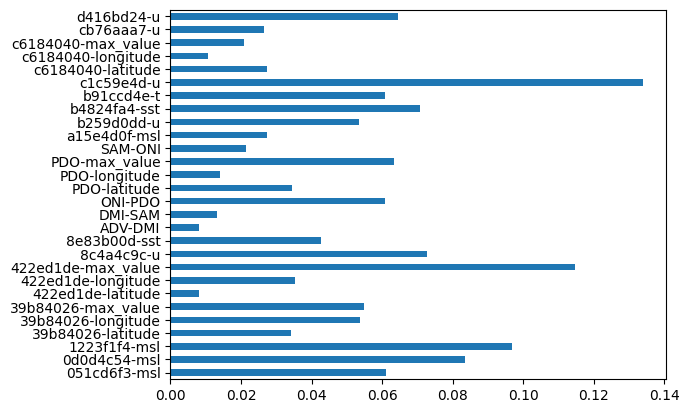

In [ ]:
experiment_1.get_feature_importance(season, "SVR-linear", method="svm")

In [22]:
get_info_experiment("69ae08a8", metadata_exp_path=metadata_exp_path, metadata_index_path=my_indices_path, extra_indices_path=extra_indices_path)

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
58cf0140,index_58cf0140.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
2888bc44,index_2888bc44.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
8b54b64b,index_8b54b64b.parquet,max,1,MSL,245|284|-45|-15,NoRef,1972-2022
b4c7101b,index_b4c7101b.parquet,anom,1,U,282|289|-34|-30,1980-2010,1972-2022
7d54b6de,index_7d54b6de.parquet,anom,1,U,289|290.5|-34|-30,1980-2010,1972-2022
429bfac6,index_429bfac6.parquet,anom,1,U,282|289|-38|-34,1980-2010,1972-2022
44df8061,index_44df8061.parquet,anom,1,U,282|288.5|-43|-38,1980-2010,1972-2022
3d666114,index_3d666114.parquet,anom,1,U,282|288.5|-53|-43,1980-2010,1972-2022
9187f258,index_9187f258.parquet,anom,1,MSL,282|290.5|-34|-30,1980-2010,1972-2022


In [ ]:
id = "69ae08a8"
season = 12
data = {season: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_{season}.parquet")}
data[season].drop(columns=["HWN", "HWA", "HWD", "HWM"], inplace=True)
labels = ["HWF"]
experiment_1 = PredictionExperiment(data, labels, [RandomForestRegressor(random_state=42, n_estimators=5)], ["RF5"], 5, id)
experiment_1.execute_experiment()
experiment_1.get_metrics("r2", "prediction", show=False)
experiment_1.get_metrics("mape", "prediction", show=False)
experiment_1.get_metrics("r2", stage="training", show=False)
experiment_1.get_metrics("mape", stage="training", show=False)
experiment_1.get_metrics("r2", stage="CV", show=False)
experiment_1.get_metrics("mape", stage="CV", show=False)
experiment_1.get_metrics("r2", stage="TSCV", show=False)
experiment_1.get_metrics("mape", stage="TSCV", show=False)

c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


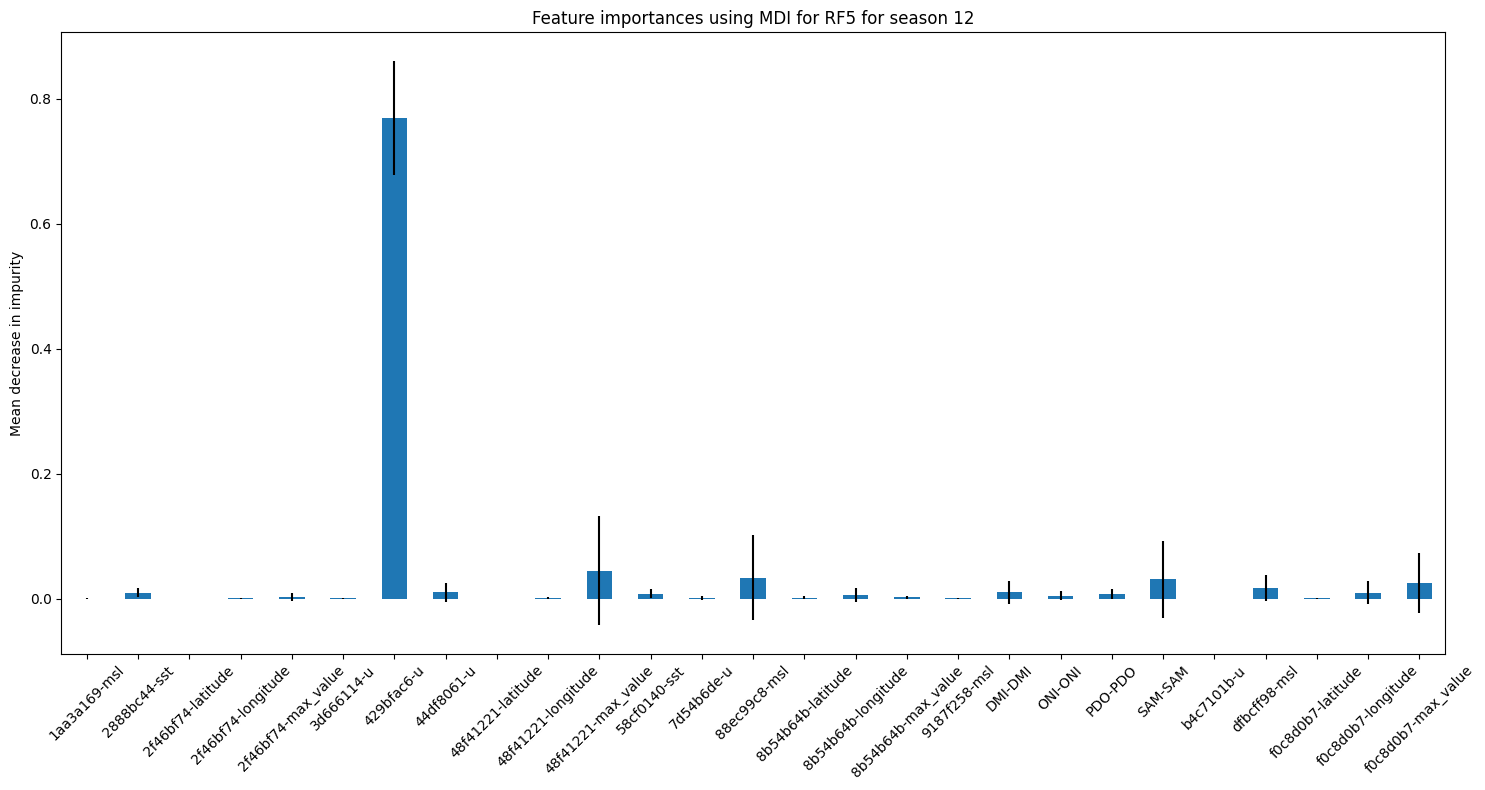

In [ ]:
experiment_1.get_feature_importance(season, "RF5", method="mdi")

In [ ]:
experiment_1.get_feature_importance(season, "RF5", method="permutation")

In [25]:
get_info_experiment("4d17ba1a", metadata_exp_path=metadata_exp_path, metadata_index_path=my_indices_path, extra_indices_path=extra_indices_path)

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
b32f5d3c,index_b32f5d3c.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
5a0aa1ca,index_5a0aa1ca.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
10bc9c48,index_10bc9c48.parquet,max,1,MSL,245|284|-45|-15,NoRef,1972-2022
d333d1c0,index_d333d1c0.parquet,anom,1,U,282|289|-34|-30,1980-2010,1972-2022
fcbed47f,index_fcbed47f.parquet,anom,1,U,289|290.5|-34|-30,1980-2010,1972-2022
46e9db11,index_46e9db11.parquet,anom,1,U,282|289|-38|-34,1980-2010,1972-2022
977078c2,index_977078c2.parquet,anom,1,U,282|288.5|-43|-38,1980-2010,1972-2022
2ab3a296,index_2ab3a296.parquet,anom,1,U,282|288.5|-53|-43,1980-2010,1972-2022
13f09277,index_13f09277.parquet,anom,1,MSL,282|290.5|-34|-30,1980-2010,1972-2022


In [ ]:
id = "4d17ba1a"
season=12
data = {season: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_{season}.parquet")}
data[season].drop(columns=["HWF", "HWA", "HWD", "HWM"], inplace=True)
labels = ["HWN"]
experiment_1 = PredictionExperiment(data, labels, [RandomForestRegressor(random_state=42, n_estimators=10)], ["RF10"], 5, id)
experiment_1.execute_experiment()
experiment_1.get_metrics("r2", "prediction", show=False)
experiment_1.get_metrics("mape", "prediction", show=False)
experiment_1.get_metrics("r2", stage="training", show=False)
experiment_1.get_metrics("mape", stage="training", show=False)
experiment_1.get_metrics("r2", stage="CV", show=False)
experiment_1.get_metrics("mape", stage="CV", show=False)
experiment_1.get_metrics("r2", stage="TSCV", show=False)
experiment_1.get_metrics("mape", stage="TSCV", show=False)

c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


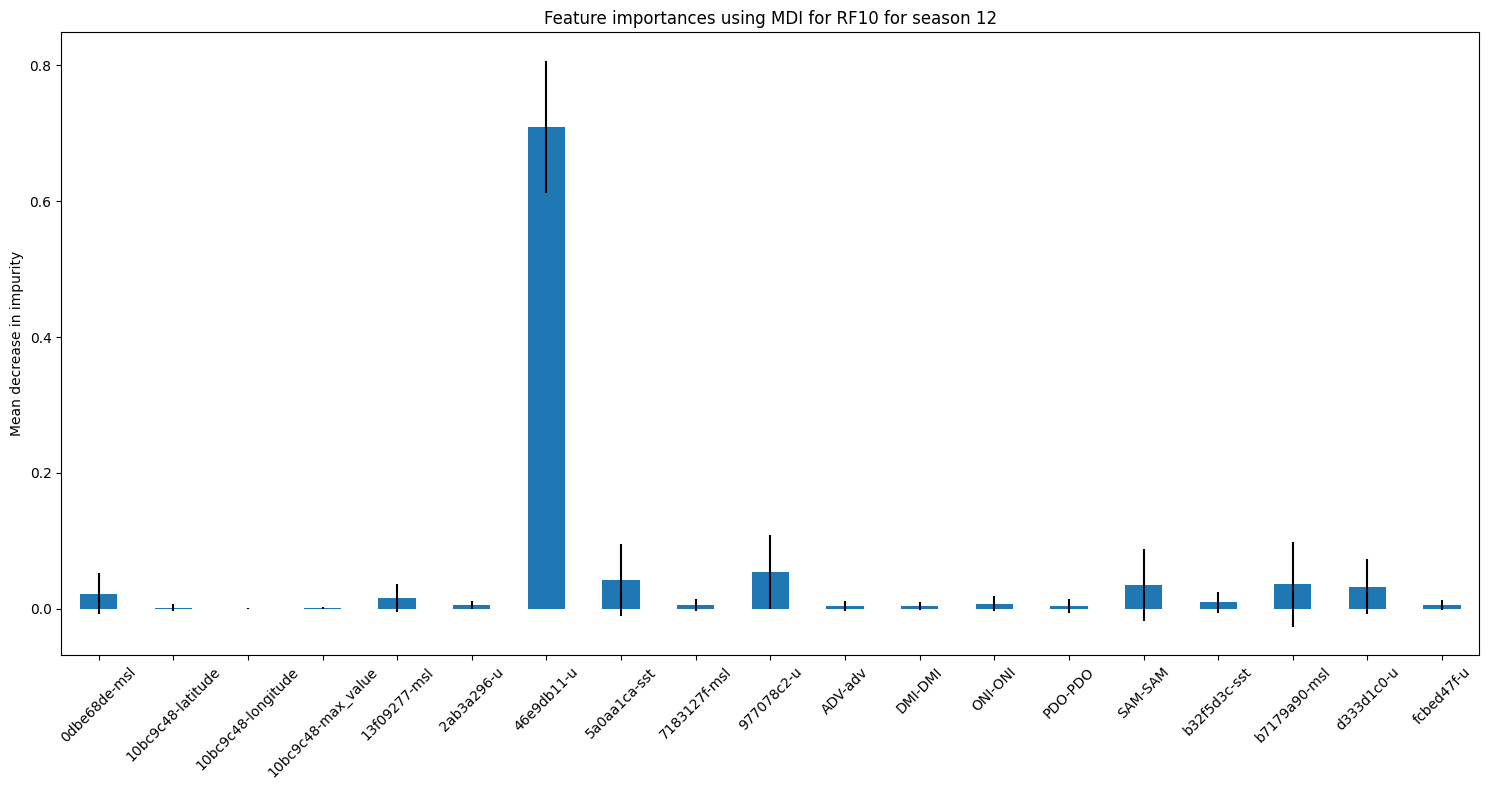

In [ ]:
experiment_1.get_feature_importance(season, "RF10", method="mdi")

In [ ]:
experiment_1.get_feature_importance(season, "RF10", method="permutation")